In [9]:
from sklearn.datasets import load_iris, load_boston, load_diabetes
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RepeatedKFold, train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.compose import TransformedTargetRegressor
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data']],
                     columns= iris['feature_names'])
data['TARGET'] = iris['target']
X = data.drop('TARGET', axis=1)
y = data.TARGET
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1, test_size=0.1)

In [41]:
pip = make_pipeline(StandardScaler(), RandomForestClassifier())
param_grid = {'standardscaler':[StandardScaler(), MinMaxScaler()], 
                         'randomforestclassifier':[RandomForestClassifier()],
                            'randomforestclassifier__n_estimators':np.arange(50, 1000, 50), 
                             'randomforestclassifier__oob_score':[True], 'randomforestclassifier__n_jobs':[-1], 'randomforestclassifier__verbose':[2]}
rskf = RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=1)
grid = GridSearchCV(pip, param_grid=param_grid, cv=rskf, verbose=2, n_jobs=-1, return_train_score=True, refit=True)

In [49]:
grid.fit(X_train, y_train)

Fitting 100 folds for each of 38 candidates, totalling 3800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 3800 out of 3800 | elapsed: 32.3min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 800building tree 2 of 800
building tree 3 of 800

building tree 4 of 800
building tree 5 of 800
building tree 6 of 800
building tree 7 of 800
building tree 8 of 800
building tree 9 of 800
building tree 10 of 800
building tree 11 of 800
building tree 12 of 800
building tree 13 of 800building tree 14 of 800building tree 15 of 800

building tree 16 of 800

building tree 17 of 800
building tree 18 of 800
building tree 19 of 800building tree 20 of 800

building tree 21 of 800
building tree 22 of 800
building tree 23 of 800building tree 24 of 800

building tree 25 of 800
building tree 26 of 800
building tree 27 of 800building tree 28 of 800
building tree 29 of 800
building tree 30 of 800
building tree 31 of 800

building tree 32 of 800
building tree 33 of 800
building tree 34 of 800
building tree 35 of 800
building tree 36 of 800
building tree 37 of 800building tree 38 of 800

building tree 39 of 800building tree 40 of 800
building tree 41 of 800
building tree 42 of 800
bu

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 156 of 800building tree 157 of 800

building tree 158 of 800
building tree 159 of 800

building tree 160 of 800building tree 161 of 800

building tree 162 of 800
building tree 163 of 800building tree 164 of 800

building tree 165 of 800building tree 166 of 800

building tree 167 of 800building tree 168 of 800
building tree 169 of 800building tree 170 of 800


building tree 171 of 800building tree 172 of 800

building tree 173 of 800
building tree 174 of 800building tree 175 of 800

building tree 176 of 800
building tree 177 of 800
building tree 178 of 800
building tree 179 of 800building tree 180 of 800building tree 181 of 800


building tree 182 of 800building tree 183 of 800

building tree 184 of 800
building tree 185 of 800building tree 186 of 800

building tree 187 of 800building tree 188 of 800building tree 189 of 800building tree 190 of 800

building tree 191 of 800


building tree 192 of 800
building tree 193 of 800
building tree 194 of 800building tree 195 of 800


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.4s


building tree 422 of 800
building tree 423 of 800building tree 424 of 800

building tree 425 of 800
building tree 426 of 800building tree 427 of 800
building tree 428 of 800
building tree 429 of 800building tree 430 of 800
building tree 431 of 800


building tree 432 of 800
building tree 433 of 800
building tree 434 of 800building tree 435 of 800building tree 436 of 800

building tree 437 of 800

building tree 438 of 800
building tree 439 of 800
building tree 440 of 800
building tree 441 of 800
building tree 442 of 800building tree 443 of 800building tree 444 of 800


building tree 445 of 800
building tree 446 of 800
building tree 447 of 800building tree 448 of 800

building tree 449 of 800
building tree 450 of 800
building tree 451 of 800
building tree 452 of 800
building tree 453 of 800
building tree 454 of 800
building tree 455 of 800
building tree 456 of 800building tree 457 of 800
building tree 458 of 800

building tree 459 of 800building tree 460 of 800
building tree 461 of 800



[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.8s


building tree 688 of 800
building tree 689 of 800
building tree 690 of 800building tree 691 of 800
building tree 692 of 800

building tree 693 of 800
building tree 694 of 800
building tree 695 of 800building tree 696 of 800

building tree 697 of 800building tree 698 of 800

building tree 699 of 800building tree 700 of 800

building tree 701 of 800
building tree 702 of 800
building tree 703 of 800
building tree 704 of 800building tree 705 of 800building tree 706 of 800


building tree 707 of 800building tree 708 of 800
building tree 709 of 800building tree 710 of 800

building tree 711 of 800
building tree 712 of 800
building tree 713 of 800
building tree 714 of 800

building tree 715 of 800building tree 716 of 800

building tree 717 of 800building tree 718 of 800

building tree 719 of 800
building tree 720 of 800building tree 721 of 800

building tree 722 of 800
building tree 723 of 800
building tree 724 of 800
building tree 725 of 800
building tree 726 of 800building tree 727 of 800



[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    1.0s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=1),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier': [RandomForestClassifier(n_estimators=800,
                                                                           n_jobs=-1,
                                                                           oob_score=True,
                                                                           verbose=2)],
                         'randomforestclassifier__n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700, 750, 800, 850, 900, 950]),
                         'randomforestclassifier__n_jobs': [-1],
                         'randomforestclassifier__oob_score': [True],
           

In [50]:
grid.score(X_train, y_train)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 800 out of 800 | elapsed:    0.0s finished


1.0

In [51]:
grid.score(X_test, y_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 800 out of 800 | elapsed:    0.0s finished


0.9333333333333333

In [73]:
train_scores=[]
test_scores=[]

rf = RandomForestClassifier(warm_start=True)
estimator_range = range(1, 100, 5)
for n_estimator in estimator_range:
    rf.n_estimators=n_estimator
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

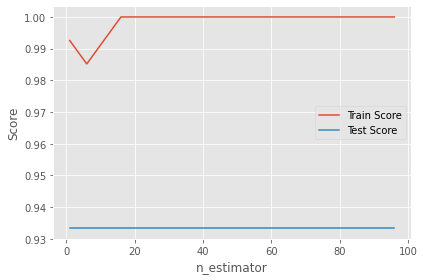

In [79]:
sns.lineplot(x=range(1, 100, 5), y=train_scores, label='Train Score')
sns.lineplot(x=range(1, 100, 5), y=test_scores, label='Test Score')
plt.legend(loc='best')
plt.gca().set(xlabel='n_estimator', ylabel='Score')
plt.tight_layout()
plt.show()

In [87]:
train_scores=[]
test_scores=[]

lr = LogisticRegression(warm_start=True)
estimator_range = np.logspace(-3, 0, 50)
for n_estimator in estimator_range:
    lr.n_estimators=n_estimator
    lr.fit(X_train, y_train)
    train_scores.append(lr.score(X_train, y_train))
    test_scores.append(lr.score(X_test, y_test))

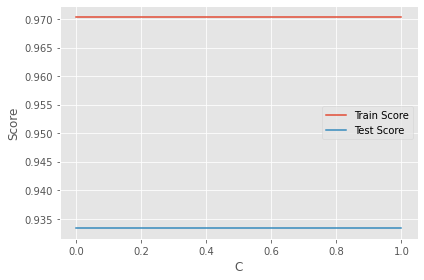

In [88]:
plt.figure()
sns.lineplot(x=np.logspace(-3, 0, 50), y=train_scores, label='Train Score')
sns.lineplot(x=np.logspace(-3, 0, 50), y=test_scores, label='Test Score')
plt.legend(loc='best')
plt.gca().set(xlabel='C', ylabel='Score')
plt.tight_layout()
plt.show()

In [91]:
voting = VotingClassifier(
                [('logreg', LogisticRegression(C=0.2)), 
                ('tree', RandomForestClassifier(n_estimators=20, random_state=1))], 
                    voting='soft')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg', LogisticRegression(C=0.2)),
                             ('tree',
                              RandomForestClassifier(n_estimators=20,
                                                     random_state=1))],
                 voting='soft')

In [92]:
lr, rfc = voting.estimators_
voting.score(X_test, y_test), lr.score(X_test, y_test), rfc.score(X_test, y_test)

(0.9333333333333333, 0.9333333333333333, 0.9333333333333333)

In [6]:
dec = DecisionTreeClassifier().fit(X_train, y_train)

In [7]:
dec.score(X_train, y_train)

1.0

In [8]:
dec.score(X_test, y_test)

0.9333333333333333

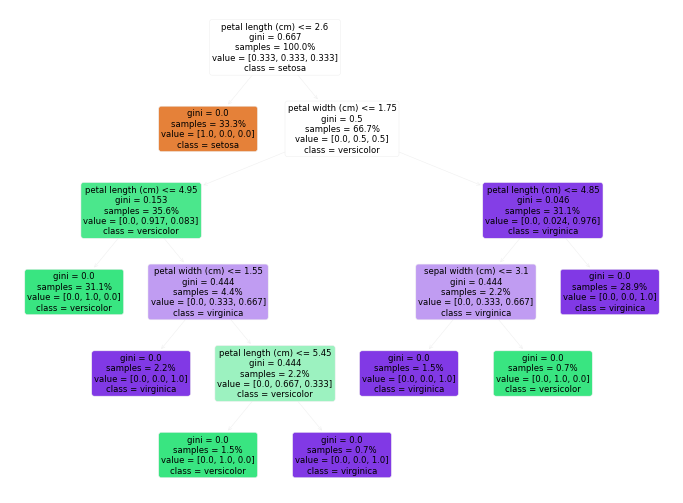

In [35]:
plt.figure(figsize=(12, 9))
tree = plot_tree(dec, feature_names=X.columns, proportion=True, rounded=True, filled=True, class_names=iris.target_names, 
                fontsize=8.5)
plt.show()

In [16]:
y.unique()

array([0, 1, 2])